In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.linear_model import LinearRegression

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 10)


In [204]:
df = pd.read_csv("data.csv")
df

,FUNDOS,TIPO,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,DIVIDEND YIELD,DY (12M) ACUMULADO,DY (3M) MÉDIA,DY (12M) MÉDIA,VARIAÇÃO PREÇO,...,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,PRTS11,SHOPPING,"117,70",NaN,"1.961,67",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,NaN,11.000,NaN,NaN,NaN
1,SRVD11,TIJOLO,"3,00","233,91","583,00","2,29 %","3,30 %","1,65 %","1,65 %","-9,79 %",...,"1,19","2,53","16,87 %","-0,11 %",0,"135,21",107.000,NaN,NaN,NaN
2,IBFF11,TIJOLO,"66,40","162.549,50","4,49","0,00 %","8,02 %","0,15 %","0,67 %","0,00 %",...,"14,78","4,49","100,08 %","-79,09 %",0,"4,20",3.870,NaN,NaN,NaN
3,RBRM11,DESENVOLVIMENTO,"94.794,81",NaN,"3,45","0,00 %","0,00 %","0,00 %","0,00 %","0,00 %",...,NaN,NaN,NaN,NaN,0,NaN,54.000,NaN,NaN,NaN
4,LOFT11B,DESENVOLVIMENTO,"29,90",NaN,"2,84","0,00 %","189,83 %","0,00 %","15,82 %","0,00 %",...,NaN,NaN,NaN,NaN,16,NaN,1.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,?,?,"42,00",1.027,"0,60","1,57 %","15,34 %","1,06 %","1,28 %","-7,79 %",...,NaN,NaN,NaN,NaN,0,"67,71",373.000,NaN,NaN,NaN
426,?,?,"9,74","4.527.574,42","1,01","1,20 %","15,22 %","1,25 %","1,27 %","2,68 %",...,"9,64","1,01","1,24 %","0,00 %",0,"10,43",226.183,NaN,NaN,NaN
427,?,?,"103,00","213.783,30","1,09","0,39 %","0,39 %","0,39 %","0,39 %","0,00 %",...,NaN,NaN,NaN,NaN,1,"85,27",286.000,NaN,NaN,NaN
428,?,?,"110,72","15.546.428,15","0,99","0,76 %","9,50 %","0,76 %","0,71 %","-1,06 %",...,"112,31","0,99","0,76 %","11,26 %",2,"13,99",370.163,NaN,NaN,NaN


In [205]:
# Dropando as 3 ultimas colunas
colunas_NA = ["TAX. GESTÃO", "TAX. PERFORMANCE", "TAX. ADMINISTRAÇÃO"]
df.drop(colunas_NA, axis=1, inplace=True)

print(df)

      FUNDOS             TIPO PREÇO ATUAL (R$) LIQUIDEZ DIÁRIA (R$)      P/VP  \
0     PRTS11         SHOPPING           117,70                  NaN  1.961,67   
1     SRVD11           TIJOLO             3,00               233,91    583,00   
2     IBFF11           TIJOLO            66,40           162.549,50      4,49   
3     RBRM11  DESENVOLVIMENTO        94.794,81                  NaN      3,45   
4    LOFT11B  DESENVOLVIMENTO            29,90                  NaN      2,84   
..       ...              ...              ...                  ...       ...   
425        ?                ?            42,00                1.027      0,60   
426        ?                ?             9,74         4.527.574,42      1,01   
427        ?                ?           103,00           213.783,30      1,09   
428        ?                ?           110,72        15.546.428,15      0,99   
429        ?                ?           105,05                  NaN      0,83   

    DIVIDEND YIELD DY (12M)

In [206]:
# Renomenado colunas para conterem o simbolo % no final
porcentagem = ["DIVIDEND YIELD", "DY (12M) ACUMULADO","DY (3M) MÉDIA", "DY (12M) MÉDIA", "VARIAÇÃO PREÇO", "DY PATRIMONIAL", "VARIAÇÃO PATRIMONIAL"]
for coluna in porcentagem:
    df[coluna] = df[coluna].str.strip(" %")
    str = coluna + " (%)"
    df = df.rename(columns={coluna: str})
df

,FUNDOS,TIPO,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,DIVIDEND YIELD (%),DY (12M) ACUMULADO (%),DY (3M) MÉDIA (%),DY (12M) MÉDIA (%),VARIAÇÃO PREÇO (%),PATRIMÔNIO LÍQUIDO,VPA,P/VPA,DY PATRIMONIAL (%),VARIAÇÃO PATRIMONIAL (%),QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS
0,PRTS11,SHOPPING,"117,70",NaN,"1.961,67",NaN,NaN,NaN,NaN,NaN,"3.111.607,44",NaN,NaN,NaN,NaN,2,NaN,11.000
1,SRVD11,TIJOLO,"3,00","233,91","583,00","2,29","3,30","1,65","1,65","-9,79","-720.474,07","1,19","2,53","16,87","-0,11",0,"135,21",107.000
2,IBFF11,TIJOLO,"66,40","162.549,50","4,49","0,00","8,02","0,15","0,67","0,00","9.855.905,16","14,78","4,49","100,08","-79,09",0,"4,20",3.870
3,RBRM11,DESENVOLVIMENTO,"94.794,81",NaN,"3,45","0,00","0,00","0,00","0,00","0,00","14.823.845,13",NaN,NaN,NaN,NaN,0,NaN,54.000
4,LOFT11B,DESENVOLVIMENTO,"29,90",NaN,"2,84","0,00","189,83","0,00","15,82","0,00","20.644.665,73",NaN,NaN,NaN,NaN,16,NaN,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,?,?,"42,00",1.027,"0,60","1,57","15,34","1,06","1,28","-7,79",39.778.168,NaN,NaN,NaN,NaN,0,"67,71",373.000
426,?,?,"9,74","4.527.574,42","1,01","1,20","15,22","1,25","1,27","2,68",994.767.385,"9,64","1,01","1,24","0,00",0,"10,43",226.183
427,?,?,"103,00","213.783,30","1,09","0,39","0,39","0,39","0,39","0,00",167.038.269,NaN,NaN,NaN,NaN,1,"85,27",286.000
428,?,?,"110,72","15.546.428,15","0,99","0,76","9,50","0,76","0,71","-1,06",3.461.722.290,"112,31","0,99","0,76","11,26",2,"13,99",370.163


In [207]:
# alterando os valores que estavam em string para float, alterando o separador de milhar das colunas porcentuais
numerais =["PREÇO ATUAL (R$)","LIQUIDEZ DIÁRIA (R$)", "P/VP","DIVIDEND YIELD (%)","DY (12M) ACUMULADO (%)","DY (3M) MÉDIA (%)","DY (12M) MÉDIA (%)", "VARIAÇÃO PREÇO (%)", "PATRIMÔNIO LÍQUIDO", "VPA","P/VPA", "DY PATRIMONIAL (%)","VARIAÇÃO PATRIMONIAL (%)", "VOLATILIDADE"]

for coluna in numerais:
    df[coluna] = df[coluna].str.replace(".", "")
    df[coluna] = df[coluna].str.replace(",", ".")
    df[coluna] = df[coluna].astype(float)

df

,FUNDOS,TIPO,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,DIVIDEND YIELD (%),DY (12M) ACUMULADO (%),DY (3M) MÉDIA (%),DY (12M) MÉDIA (%),VARIAÇÃO PREÇO (%),PATRIMÔNIO LÍQUIDO,VPA,P/VPA,DY PATRIMONIAL (%),VARIAÇÃO PATRIMONIAL (%),QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS
0,PRTS11,SHOPPING,117.700,NaN,1961.670,NaN,NaN,NaN,NaN,NaN,3111607.440,NaN,NaN,NaN,NaN,2,NaN,11.000
1,SRVD11,TIJOLO,3.000,233.910,583.000,2.290,3.300,1.650,1.650,-9.790,-720474.070,1.190,2.530,16.870,-0.110,0,135.210,107.000
2,IBFF11,TIJOLO,66.400,162549.500,4.490,0.000,8.020,0.150,0.670,0.000,9855905.160,14.780,4.490,100.080,-79.090,0,4.200,3.870
3,RBRM11,DESENVOLVIMENTO,94794.810,NaN,3.450,0.000,0.000,0.000,0.000,0.000,14823845.130,NaN,NaN,NaN,NaN,0,NaN,54.000
4,LOFT11B,DESENVOLVIMENTO,29.900,NaN,2.840,0.000,189.830,0.000,15.820,0.000,20644665.730,NaN,NaN,NaN,NaN,16,NaN,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,?,?,42.000,1027.000,0.600,1.570,15.340,1.060,1.280,-7.790,39778168.000,NaN,NaN,NaN,NaN,0,67.710,373.000
426,?,?,9.740,4527574.420,1.010,1.200,15.220,1.250,1.270,2.680,994767385.000,9.640,1.010,1.240,0.000,0,10.430,226.183
427,?,?,103.000,213783.300,1.090,0.390,0.390,0.390,0.390,0.000,167038269.000,NaN,NaN,NaN,NaN,1,85.270,286.000
428,?,?,110.720,15546428.150,0.990,0.760,9.500,0.760,0.710,-1.060,3461722290.000,112.310,0.990,0.760,11.260,2,13.990,370.163


Text(0.5, 1.0, 'Matriz Correlacao')

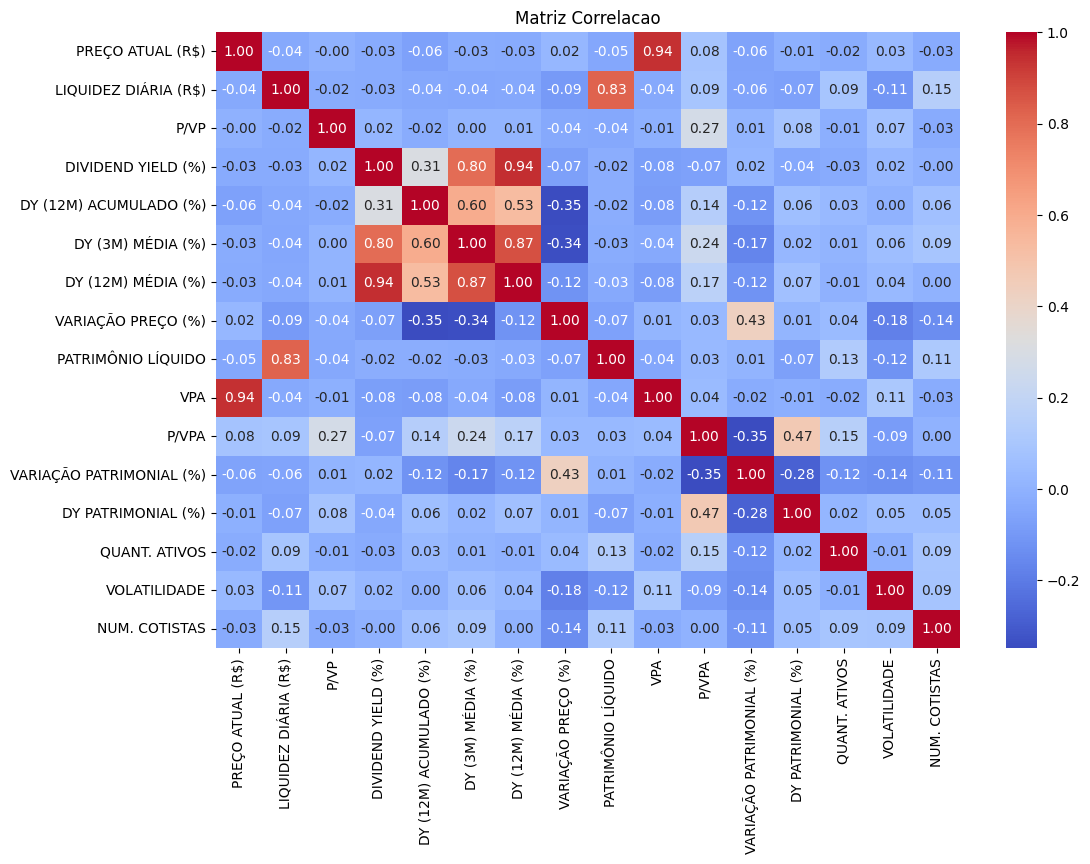

In [208]:
# verificando a matriz de correlação
colunas = ["PREÇO ATUAL (R$)", "LIQUIDEZ DIÁRIA (R$)", "P/VP", "DIVIDEND YIELD (%)", "DY (12M) ACUMULADO (%)", "DY (3M) MÉDIA (%)", "DY (12M) MÉDIA (%)", "VARIAÇÃO PREÇO (%)", "PATRIMÔNIO LÍQUIDO", "VPA", "P/VPA","VARIAÇÃO PATRIMONIAL (%)", "DY PATRIMONIAL (%)",	"QUANT. ATIVOS", "VOLATILIDADE", "NUM. COTISTAS"]
matriz_cor = df[colunas].corr()

plt.figure(figsize=(12,8))
sns.heatmap(matriz_cor, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz Correlacao")
#plt.show

In [209]:
# dropa os valores nulos da coluna TIPO
df.dropna(subset=['TIPO'], inplace=True)

num_coluna = len(df.columns)

df.dropna(thresh=num_coluna - 7 + 1, axis=0, inplace=True)

pre_balanceamento = df["TIPO"] 


# Verificando o balanceamento das classes
print("Classes pré balanceamento:", Counter(pre_balanceamento))

Classes pré balanceamento: Counter({'TIJOLO': 219, 'PAPEL': 79, 'DESENVOLVIMENTO': 36, 'MISTO': 22, 'SHOPPING': 22, '?': 5})


In [210]:
# Como visto na Matriz de Correlacoes, Preco Atual e VPA sao altamente relacionadas, logo, podemos utilziar Regressao para encontrar valores faltantes de VPA
print("Numero de NaN antes da Regressao: ")
print("Preco Atual: ", df["PREÇO ATUAL (R$)"].isna().sum())
print("VPA: ", df["VPA"].isna().sum())

# Como existem poucos NaN em Preco, Atual, dropamos os mesmos
df.dropna(how='any', subset=['PREÇO ATUAL (R$)'], axis=0, inplace=True)

# Separamos a coluna VPA em dados conhecidos e desconhecidos
dados_conhecidos = df.dropna(subset=['VPA'])
dados_desconhecidos = df[df['VPA'].isna()]

modelo_regressao = LinearRegression()

# Treinar o modelo usando os dados conhecidos
modelo_regressao.fit(dados_conhecidos[['PREÇO ATUAL (R$)']], dados_conhecidos['VPA'])

# Prever os valores desconhecidos
valores_preditos = modelo_regressao.predict(dados_desconhecidos[['PREÇO ATUAL (R$)']])

# Preencher os valores NaN no DataFrame original com os valores previstos
df.loc[df['VPA'].isna(), 'VPA'] = valores_preditos

print("Numero de NaN depois da Regressao: ")
print("Preco Atual: ", df["PREÇO ATUAL (R$)"].isna().sum())
print("VPA: ", df["VPA"].isna().sum())

df


Numero de NaN antes da Regressao: 
Preco Atual:  6
VPA:  87
Numero de NaN depois da Regressao: 
Preco Atual:  0
VPA:  0


,FUNDOS,TIPO,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,DIVIDEND YIELD (%),DY (12M) ACUMULADO (%),DY (3M) MÉDIA (%),DY (12M) MÉDIA (%),VARIAÇÃO PREÇO (%),PATRIMÔNIO LÍQUIDO,VPA,P/VPA,DY PATRIMONIAL (%),VARIAÇÃO PATRIMONIAL (%),QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS
1,SRVD11,TIJOLO,3.000,233.910,583.000,2.290,3.300,1.650,1.650,-9.790,-720474.070,1.190,2.530,16.870,-0.110,0,135.210,107.000
2,IBFF11,TIJOLO,66.400,162549.500,4.490,0.000,8.020,0.150,0.670,0.000,9855905.160,14.780,4.490,100.080,-79.090,0,4.200,3.870
3,RBRM11,DESENVOLVIMENTO,94794.810,NaN,3.450,0.000,0.000,0.000,0.000,0.000,14823845.130,70465.442,NaN,NaN,NaN,0,NaN,54.000
4,LOFT11B,DESENVOLVIMENTO,29.900,NaN,2.840,0.000,189.830,0.000,15.820,0.000,20644665.730,142.329,NaN,NaN,NaN,16,NaN,1.000
5,KINP11,DESENVOLVIMENTO,9.820,38394.200,2.660,0.000,31.630,1.640,2.640,0.000,26408606.840,3.690,2.660,78.460,-16.140,0,44.900,1.932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,?,?,42.000,1027.000,0.600,1.570,15.340,1.060,1.280,-7.790,39778168.000,151.309,NaN,NaN,NaN,0,67.710,373.000
426,?,?,9.740,4527574.420,1.010,1.200,15.220,1.250,1.270,2.680,994767385.000,9.640,1.010,1.240,0.000,0,10.430,226.183
427,?,?,103.000,213783.300,1.090,0.390,0.390,0.390,0.390,0.000,167038269.000,196.576,NaN,NaN,NaN,1,85.270,286.000
428,?,?,110.720,15546428.150,0.990,0.760,9.500,0.760,0.710,-1.060,3461722290.000,112.310,0.990,0.760,11.260,2,13.990,370.163


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

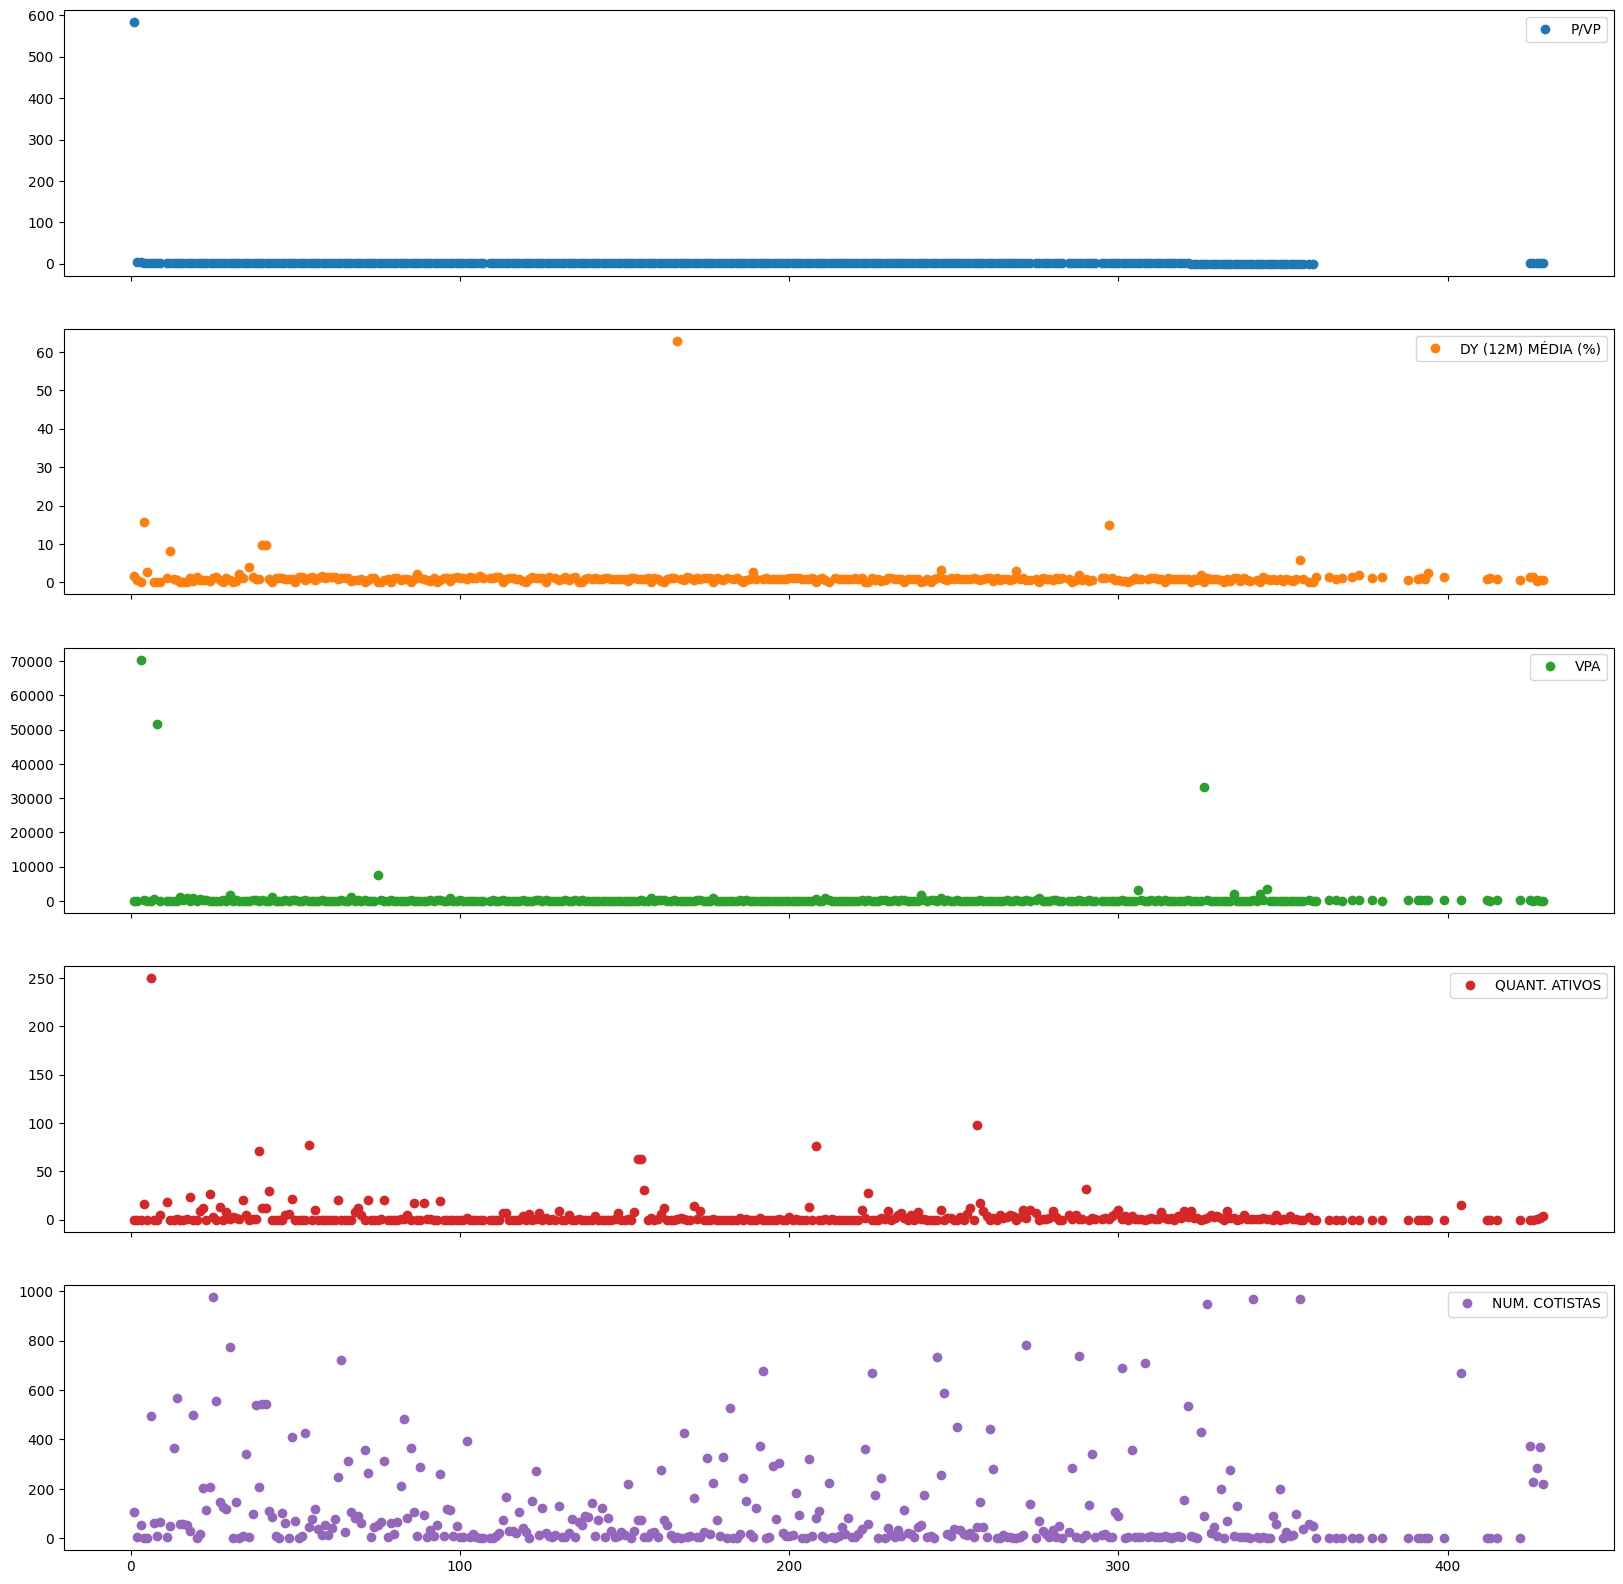

In [211]:
# plots
newDf = df[["TIPO","P/VP", "DY (12M) MÉDIA (%)", "VPA", "QUANT. ATIVOS", "NUM. COTISTAS"]].copy()

newDf.plot(subplots=True, figsize=(20, 20),style='o')

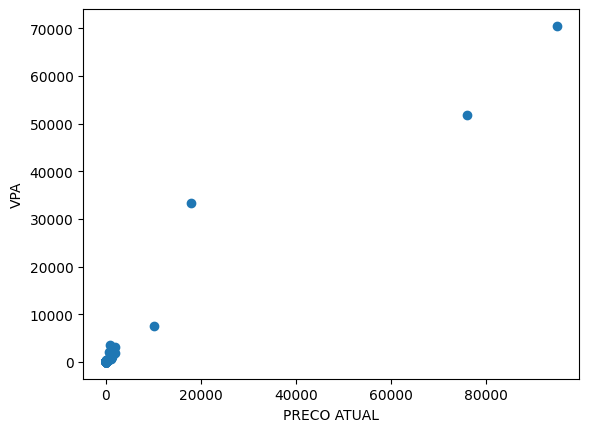

In [212]:
plt.scatter(df['PREÇO ATUAL (R$)'], df['VPA'])
plt.xlabel('PRECO ATUAL')
plt.ylabel('VPA')
plt.show()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

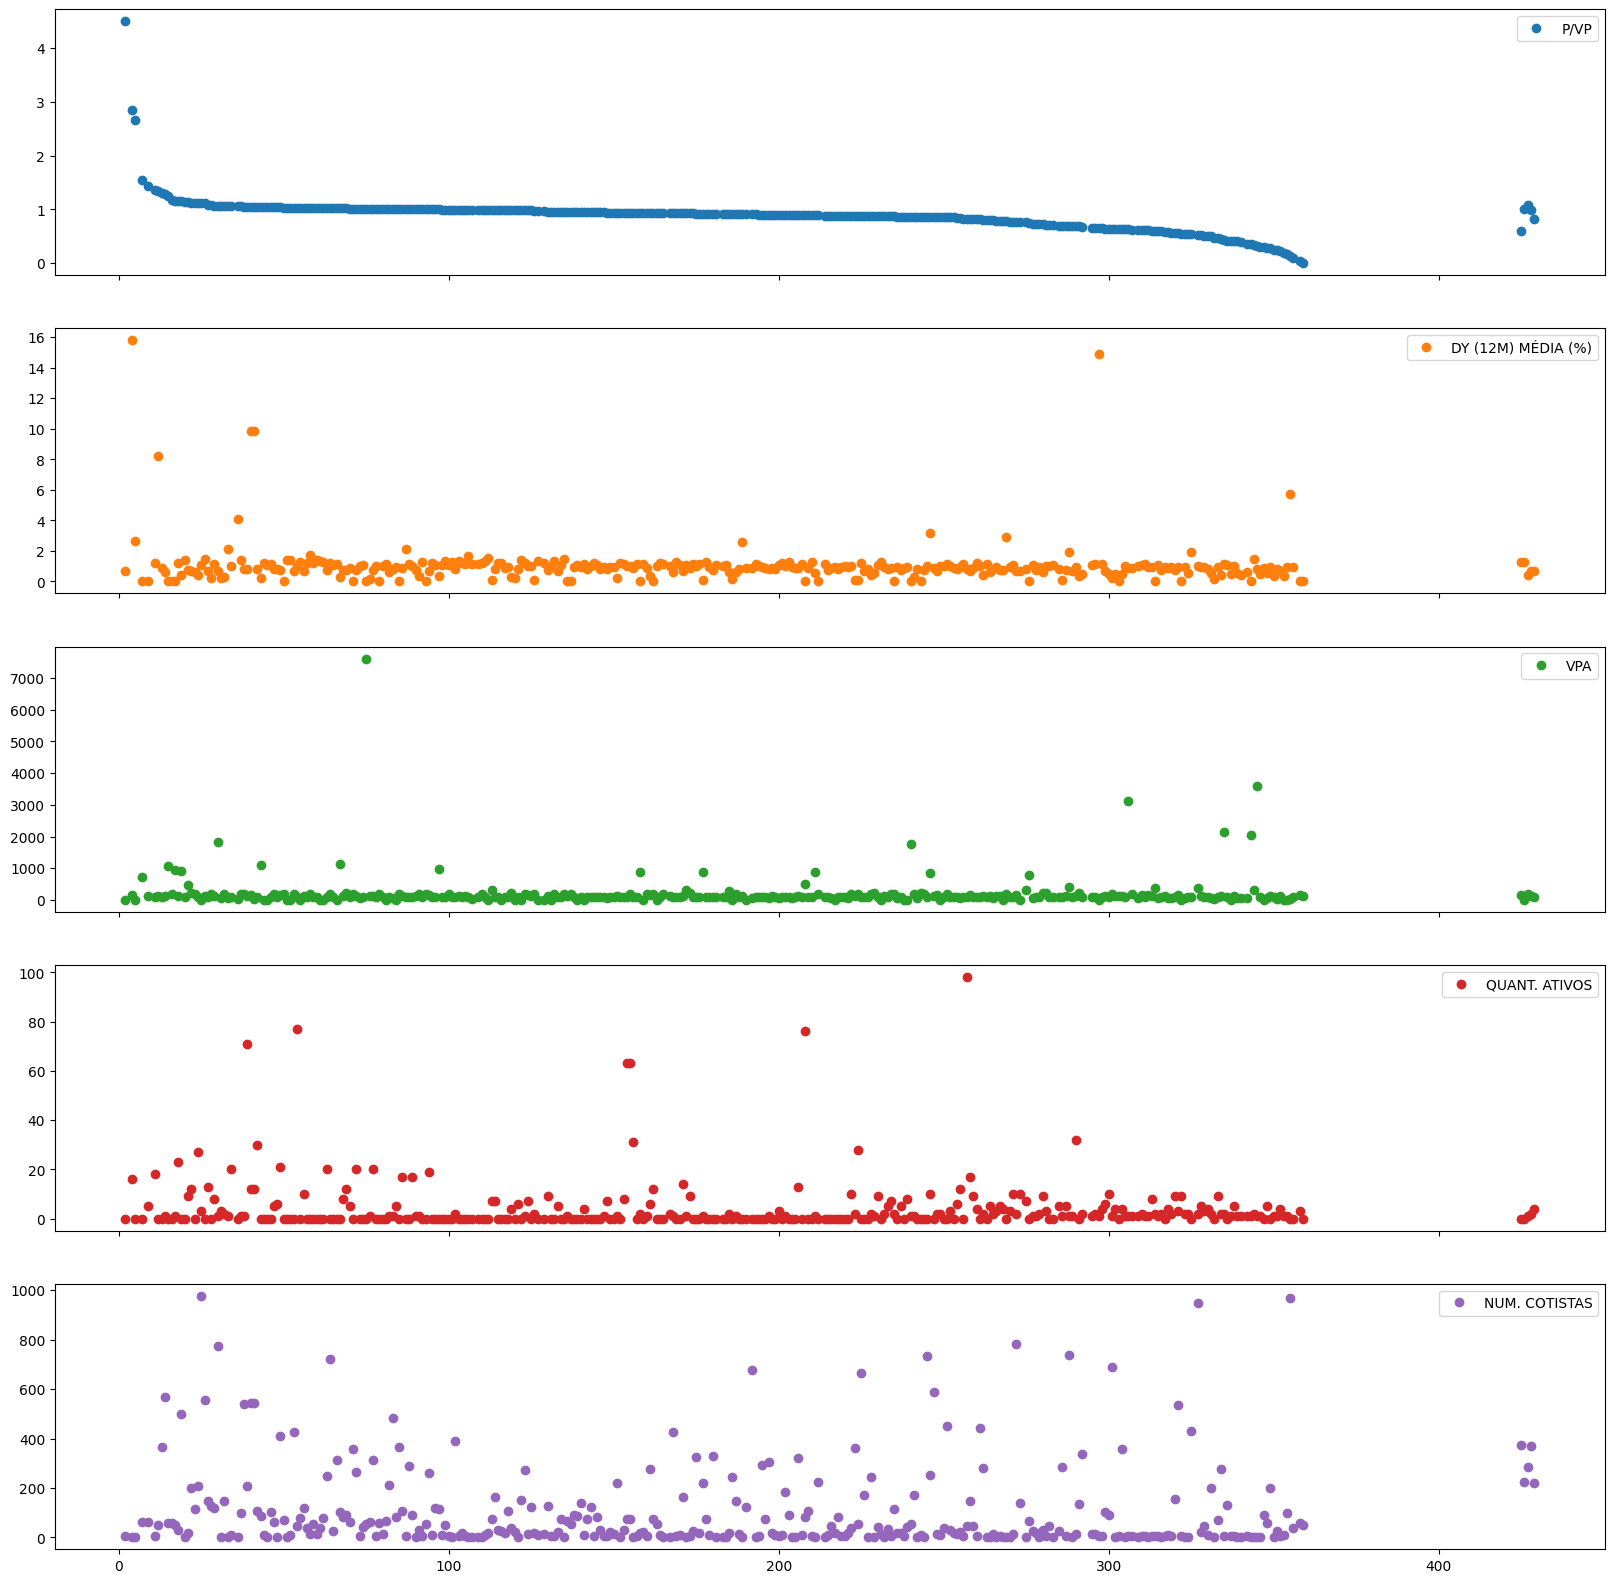

In [213]:
#retirada de outliners
newDf = newDf[newDf["P/VP"] <= 5]
newDf = newDf[newDf["DY (12M) MÉDIA (%)"] <= 20]
newDf = newDf[newDf["QUANT. ATIVOS"] <= 150]
newDf = newDf[newDf["VPA"] <= 30000]

newDf.plot(subplots=True, figsize=(20, 20),style='o')

In [214]:
grupos =["TIJOLO","PAPEL","MISTO","DESENVOLVIMENTO","SHOPPING"]
colunas = ["P/VP", "DY (12M) MÉDIA (%)", "QUANT. ATIVOS", "NUM. COTISTAS"]

# Preencher valores NaN nas colunas específicas usando a média de cada grupo
for coluna in colunas:
    for grupo in grupos:
        # Calcula a média do grupo na coluna atual e preenche os NaN na coluna correspondente
        media_grupo = newDf.loc[newDf['TIPO'] == grupo, coluna].mean()
        newDf.loc[newDf['TIPO'] == grupo, coluna] = newDf.loc[newDf['TIPO'] == grupo, coluna].fillna(media_grupo)

In [215]:
# Balanceando as classes

pre_balanceamento = newDf["TIPO"]
# Verificando o balanceamento das classes
print("Classes pré balanceamento:", Counter(pre_balanceamento))

# Criando dataset que não contém amostras com tipo "?"
dfPredict = newDf[newDf["TIPO"] != "?"]

x = dfPredict[["P/VP", "DY (12M) MÉDIA (%)", "VPA", "QUANT. ATIVOS", "NUM. COTISTAS"]]
y = dfPredict["TIPO"]

# Convertendo DataFrames para matrizes NumPy
x = x.values
y = y.values

#reduzindo as amostras de tijolo pela metade
tamanho_undersampling = int(len(y[y == "TIJOLO"]) * 0.4)
rus = RandomUnderSampler(sampling_strategy={"TIJOLO": tamanho_undersampling})
x_resampled, y_resampled = rus.fit_resample(x, y)

# Verificando a contagem de classes após o balanceamento
print("Contagem de classes após o balanceamento:", Counter(y_resampled))

Classes pré balanceamento: Counter({'TIJOLO': 201, 'PAPEL': 74, 'DESENVOLVIMENTO': 25, 'SHOPPING': 20, 'MISTO': 19, '?': 5})
Contagem de classes após o balanceamento: Counter({'TIJOLO': 80, 'PAPEL': 74, 'DESENVOLVIMENTO': 25, 'SHOPPING': 20, 'MISTO': 19})


In [216]:
# treinos 
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2000, random_state=42)

clf = DecisionTreeClassifier()

# Definindo os hiperparâmetros a serem testados
param_grid = {
    'max_depth': [None, 4, 5, 7],       # (representando a profundidade máxima da árvore) 
    'min_samples_leaf': [ 2,3, 4],      # Número mínimo de amostras necessárias para ser uma folha (nó final)
    'min_samples_split': [3, 4, 5]   # Número mínimo de amostras necessárias para dividir um nó interno.
}

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)

# Treinando o modelo com diferentes combinações de hiperparâmetros
grid_search.fit(x_train, y_train)

# Obtendo os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Avaliando o modelo com os melhores hiperparâmetros
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(x_train, y_train)
y_pred = best_clf.predict(x_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia com os melhores hiperparâmetros:", accuracy)

newData = newDf[newDf["TIPO"] == "?"]
newData = newData[["P/VP", "DY (12M) MÉDIA (%)", "VPA", "QUANT. ATIVOS", "NUM. COTISTAS"]]
print(newData)

predict = best_clf.predict(newData)
print(predict)



'''
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

newData = newDf[newDf["TIPO"] == "?"]
newData = newData[["P/VP", "DY (12M) MÉDIA (%)", "QUANT. ATIVOS", "NUM. COTISTAS"]]
print(newData)

predict = clf.predict(newData)
print(predict)
'''

#tijolo , papel, tijolo, shopping, tijolo INICIAL
# Tijolo, Papel, Tijolo, Tijolo, Tijolo

# papel, papel, shooping, tijolo, tijolo
# papel, papel, desenvolvimento, tijolo, tijolo



#plt.figure(figsize=(20, 10))
#plot_tree(clf, filled=True, feature_names=x.columns, class_names=dfPredict["TIPO"].unique(), rounded=True)
#plt.savefig('decision_tree.png')  # Adjust the filename and format as needed
#plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 4}
Acurácia com os melhores hiperparâmetros: 0.4318181818181818
     P/VP  DY (12M) MÉDIA (%)     VPA  QUANT. ATIVOS  NUM. COTISTAS
425 0.600               1.280 151.309              0        373.000
426 1.010               1.270   9.640              0        226.183
427 1.090               0.390 196.576              1        286.000
428 0.990               0.710 112.310              2        370.163
429 0.830               0.650 100.970              4        220.000
['PAPEL' 'PAPEL' 'DESENVOLVIMENTO' 'DESENVOLVIMENTO' 'TIJOLO']


/usr/local/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


'\nclf.fit(x_train, y_train)\n\ny_pred = clf.predict(x_test)\n\naccuracy = accuracy_score(y_test, y_pred)\nprint(accuracy)\n\nnewData = newDf[newDf["TIPO"] == "?"]\nnewData = newData[["P/VP", "DY (12M) MÉDIA (%)", "QUANT. ATIVOS", "NUM. COTISTAS"]]\nprint(newData)\n\npredict = clf.predict(newData)\nprint(predict)\n'